In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

In [ ]:
!unzip delhi_weather.zip

Archive:  delhi_weather.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


In [ ]:
# 1. Load and Inspect the Data
train_df = pd.read_csv('DailyDelhiClimateTrain.csv')
test_df = pd.read_csv('DailyDelhiClimateTest.csv')

print("Training Data Head:")
print(train_df.head())
print("\nTest Data Head:")
print(test_df.head())

Training Data Head:
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

Test Data Head:
         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [ ]:
# 2. Preprocess the Data
# Drop the date column since it is non-numeric.
train_df.drop('date', axis=1, inplace=True)
test_df.drop('date', axis=1, inplace=True)

# Optional: check the remaining columns
print("Columns:", train_df.columns.tolist())

# Scale the data: fit the scaler on training data then transform both train and test.
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

Columns: ['meantemp', 'humidity', 'wind_speed', 'meanpressure']


In [ ]:
# 3. Create a Multivariate Dataset
def create_multivariate_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :])
        y.append(data[i+n_steps, :])
    return np.array(X), np.array(y)

# Set the number of time steps for the look-back period.
n_steps = 50

X_train, y_train = create_multivariate_dataset(train_scaled, n_steps)
X_test, y_test = create_multivariate_dataset(test_scaled, n_steps)

print("X_train shape:", X_train.shape)  # Expected: (samples, n_steps, num_features)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1412, 50, 4)
y_train shape: (1412, 4)
X_test shape: (64, 50, 4)
y_test shape: (64, 4)


In [ ]:
# 4. Build and Train the Models
num_features = X_train.shape[2]  # All features (meantemp, humidity, wind_speed, meanpressure)

# --- RNN Model ---
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(n_steps, num_features)),
    Dense(num_features)
])
rnn_model.compile(optimizer='adam', loss='mse')
print("\nTraining RNN model...")
rnn_model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

# --- LSTM Model ---
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, num_features)),
    Dense(num_features)
])
lstm_model.compile(optimizer='adam', loss='mse')
print("\nTraining LSTM model...")
lstm_model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training RNN model...
Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0351 - val_loss: 0.0062
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - val_loss: 0.0067
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060 - val_loss: 0.0061
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - val_loss: 0.0048
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0055 - val_loss: 0.0046
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - val_loss: 0.0045
Epoch 9/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 10/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 11/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 12/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [ ]:
# 5. Evaluate and Predict
# Predict on the test set
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)

# Inverse transform the predictions and true values back to original scale.
rnn_pred_inv = scaler.inverse_transform(rnn_pred)
lstm_pred_inv = scaler.inverse_transform(lstm_pred)
y_test_inv = scaler.inverse_transform(y_test)

# For evaluation, we focus on the "meantemp" column (assumed to be the first column)
rnn_mse = mean_squared_error(y_test_inv[:, 0], rnn_pred_inv[:, 0])
rnn_mae = mean_absolute_error(y_test_inv[:, 0], rnn_pred_inv[:, 0])
lstm_mse = mean_squared_error(y_test_inv[:, 0], lstm_pred_inv[:, 0])
lstm_mae = mean_absolute_error(y_test_inv[:, 0], lstm_pred_inv[:, 0])

print(f'\nRNN - MSE (meantemp): {rnn_mse:.4f}, MAE (meantemp): {rnn_mae:.4f}')
print(f'LSTM - MSE (meantemp): {lstm_mse:.4f}, MAE (meantemp): {lstm_mae:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 

RNN - MSE (meantemp): 2.8363, MAE (meantemp): 1.3558
LSTM - MSE (meantemp): 4.6074, MAE (meantemp): 1.7567


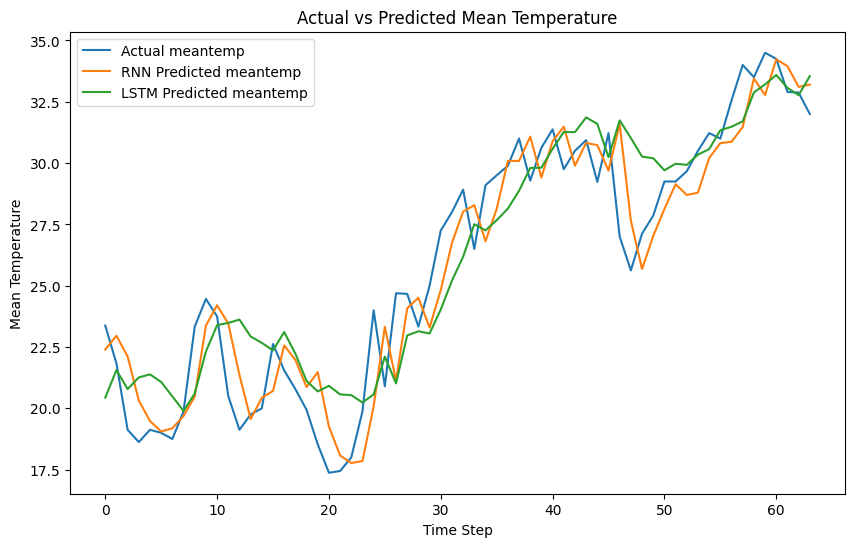

In [ ]:
# 6. Plot the Results
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv[:, 0], label='Actual meantemp')
plt.plot(rnn_pred_inv[:, 0], label='RNN Predicted meantemp')
plt.plot(lstm_pred_inv[:, 0], label='LSTM Predicted meantemp')
plt.title("Actual vs Predicted Mean Temperature")
plt.xlabel("Time Step")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

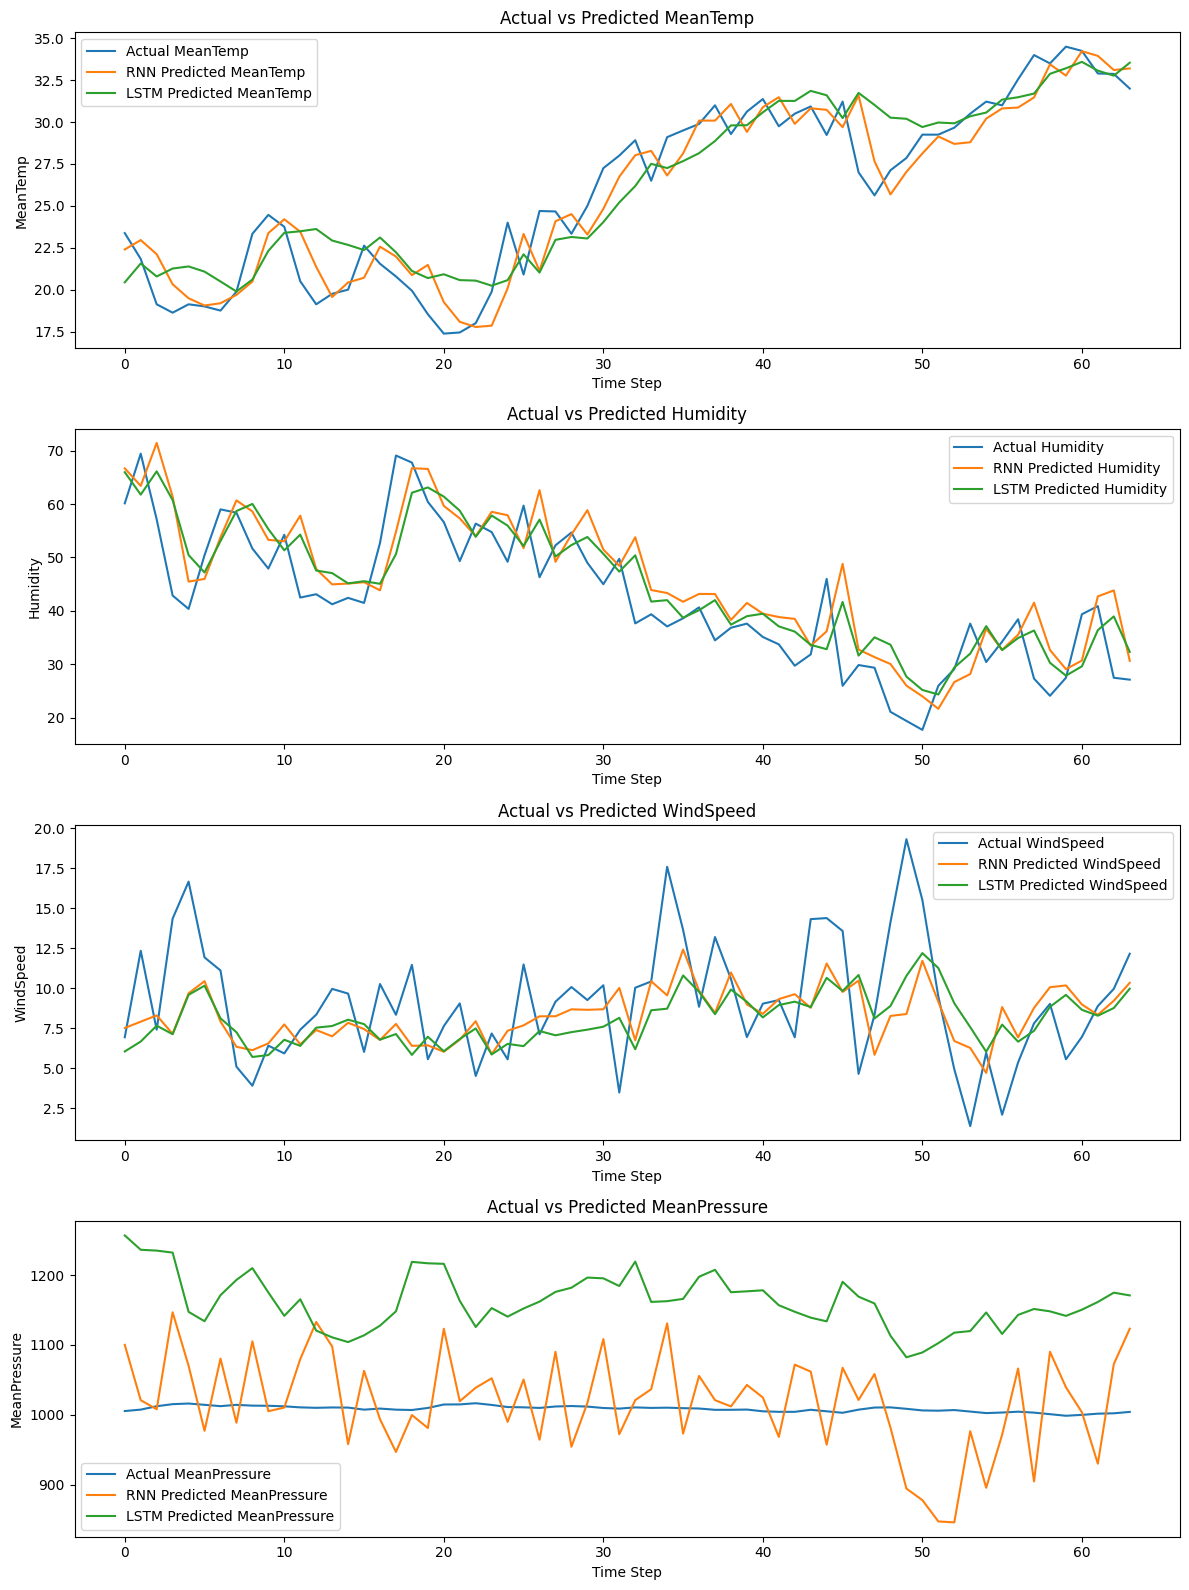

In [ ]:
import matplotlib.pyplot as plt

feature_names = ['MeanTemp', 'Humidity', 'WindSpeed', 'MeanPressure']

plt.figure(figsize=(12, 16))

num_features = y_test_inv.shape[1]  # Should be 4 in our case

for i in range(num_features):
    plt.subplot(num_features, 1, i+1)
    plt.plot(y_test_inv[:, i], label=f'Actual {feature_names[i]}')
    plt.plot(rnn_pred_inv[:, i], label=f'RNN Predicted {feature_names[i]}')
    plt.plot(lstm_pred_inv[:, i], label=f'LSTM Predicted {feature_names[i]}')
    plt.title(f'Actual vs Predicted {feature_names[i]}')
    plt.xlabel('Time Step')
    plt.ylabel(feature_names[i])
    plt.legend()

plt.tight_layout()
plt.show()


# V2 🙀🙀🙀

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# V2 MODELS (IMPROVED)

# We add layers, dropout, more epochs, and early stopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 4.1 Build and Train the "Better" RNN Model (V2)
rnn_model_V2 = Sequential([
    SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(n_steps, num_features)),
    Dropout(0.2),
    SimpleRNN(64, activation='relu'),
    Dropout(0.2),
    Dense(num_features)
])
rnn_model_V2.compile(optimizer='adam', loss='mse')
print("\nTraining RNN model V2...")
history_rnn_V2 = rnn_model_V2.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# 4.2 Build and Train the "Better" LSTM Model (V2)
lstm_model_V2 = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps, num_features)),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(num_features)
])
lstm_model_V2.compile(optimizer='adam', loss='mse')
print("\nTraining LSTM model V2...")
history_lstm_V2 = lstm_model_V2.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Training RNN model V2...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - loss: 0.0731 - val_loss: 0.0078
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0184 - val_loss: 0.0063
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0151 - val_loss: 0.0052
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0122 - val_loss: 0.0068
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0121 - val_loss: 0.0050
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0110 - val_loss: 0.0054
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0106 - val_loss: 0.0046
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0102 - val_loss: 0.0048
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0092 - val_loss: 0.0048
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0091 - val_loss: 0.0051
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0086 - val_loss: 0.0044
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0089 - val

In [ ]:
# 5.1 Evaluate and Predict (V2)
rnn_pred_V2 = rnn_model_V2.predict(X_test)
lstm_pred_V2 = lstm_model_V2.predict(X_test)

rnn_pred_V2_inv = scaler.inverse_transform(rnn_pred_V2)
lstm_pred_V2_inv = scaler.inverse_transform(lstm_pred_V2)

# Evaluate on the first feature (meantemp)
rnn_mse_V2 = mean_squared_error(y_test_inv[:, 0], rnn_pred_V2_inv[:, 0])
rnn_mae_V2 = mean_absolute_error(y_test_inv[:, 0], rnn_pred_V2_inv[:, 0])
lstm_mse_V2 = mean_squared_error(y_test_inv[:, 0], lstm_pred_V2_inv[:, 0])
lstm_mae_V2 = mean_absolute_error(y_test_inv[:, 0], lstm_pred_V2_inv[:, 0])

print(f'\nRNN V2 - MSE (meantemp): {rnn_mse_V2:.4f}, MAE (meantemp): {rnn_mae_V2:.4f}')
print(f'LSTM V2 - MSE (meantemp): {lstm_mse_V2:.4f}, MAE (meantemp): {lstm_mae_V2:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

RNN V2 - MSE (meantemp): 3.7524, MAE (meantemp): 1.5938
LSTM V2 - MSE (meantemp): 8.0074, MAE (meantemp): 2.5047


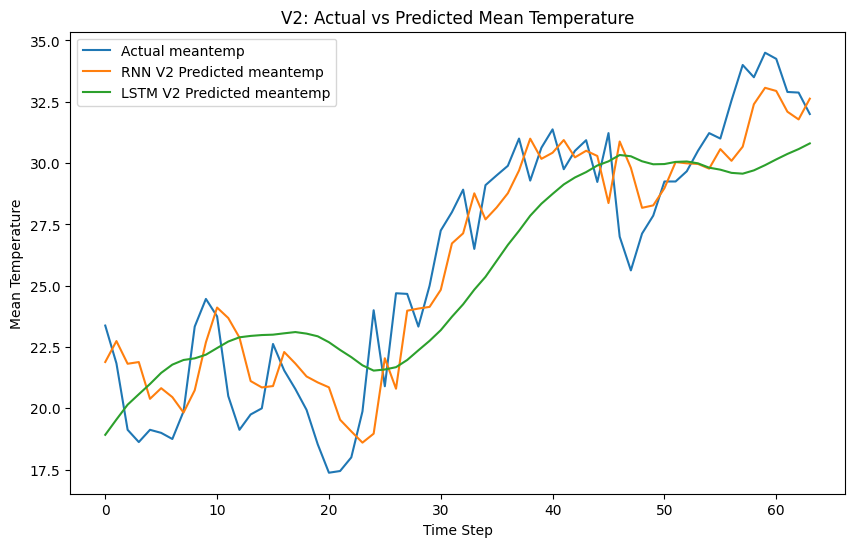

In [ ]:
# 6.1 Plot the Results (V2) - Single Feature (meantemp)
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv[:, 0], label='Actual meantemp')
plt.plot(rnn_pred_V2_inv[:, 0], label='RNN V2 Predicted meantemp')
plt.plot(lstm_pred_V2_inv[:, 0], label='LSTM V2 Predicted meantemp')
plt.title("V2: Actual vs Predicted Mean Temperature")
plt.xlabel("Time Step")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

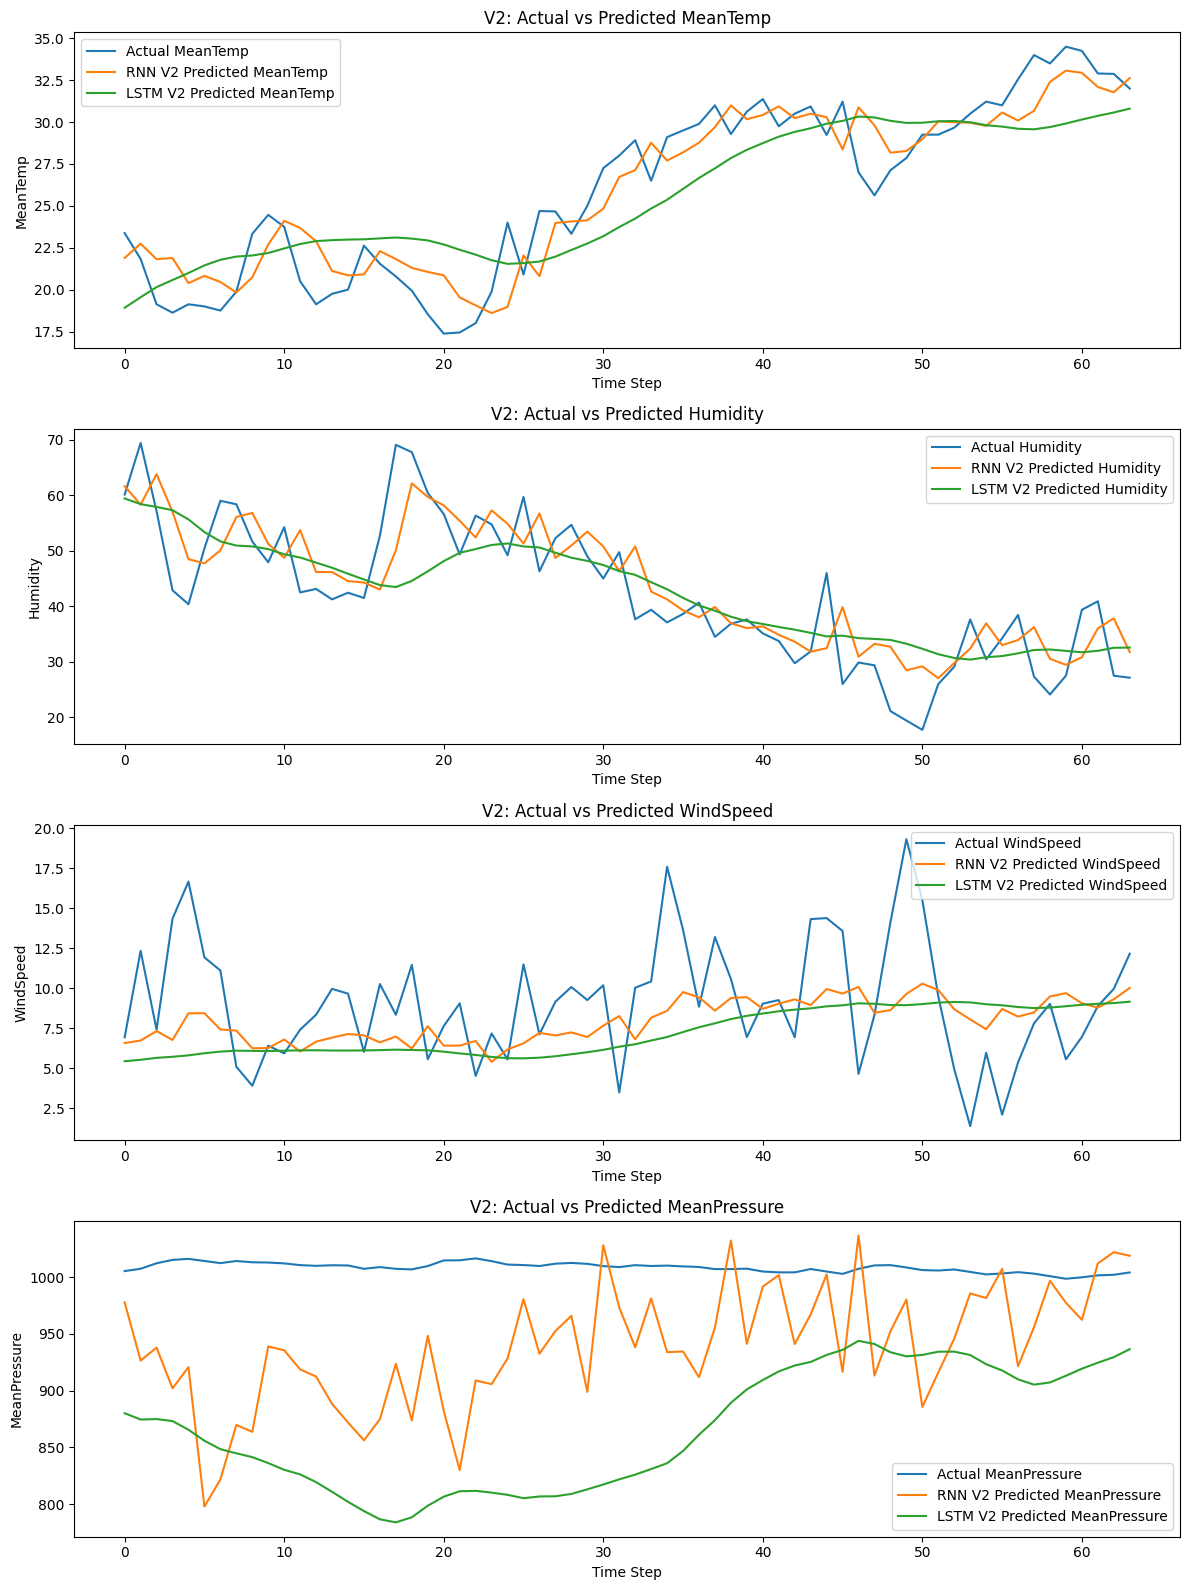

In [ ]:
# Plot all features (V2)
plt.figure(figsize=(12, 16))
for i in range(num_features):
    plt.subplot(num_features, 1, i+1)
    plt.plot(y_test_inv[:, i], label=f'Actual {feature_names[i]}')
    plt.plot(rnn_pred_V2_inv[:, i], label=f'RNN V2 Predicted {feature_names[i]}')
    plt.plot(lstm_pred_V2_inv[:, i], label=f'LSTM V2 Predicted {feature_names[i]}')
    plt.title(f'V2: Actual vs Predicted {feature_names[i]}')
    plt.xlabel('Time Step')
    plt.ylabel(feature_names[i])
    plt.legend()

plt.tight_layout()
plt.show()